In [ ]:
  # de https://raw.githubusercontent.com/fchollet/keras/master/examples/lstm_text_generation.py
#
# Example script to generate text from Nietzsche's writings.
#
# At least 20 epochs are required before the generated text
# starts sounding coherent.
#
# It is recommended to run this script on GPU, as recurrent
# networks are quite computationally intensive.
#
# If you try this script on new data, make sure your corpus
# has at least ~100k characters. ~1M is better.


from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

from keras.utils.data_utils import get_file
import random
import numpy as np
import sys


In [ ]:
#path = get_file('nietzsche.txt', origin='/content/shakespeare.txt')
#text = open(path).read().lower()

text = open('shakespeare.txt').read().lower()

print('corpus length:', len(text))

chars = sorted(list(set(text)))
print('total different chars:', len(chars))
print(chars)
char2index = dict((c, i) for i, c in enumerate(chars))
index2char = dict((i, c) for i, c in enumerate(chars))

corpus length: 5458198
total different chars: 65
['\n', ' ', '!', '"', '#', '%', '&', "'", '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', '[', ']', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '|', '}', '~']


In [ ]:
print(char2index['a'])
print(index2char[20])

36
5


In [ ]:
# cut the text in semi-redundant sequences of maxlen characters
maxlen = 10
step = 2
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('number of sequences:', len(sentences))
print()
print(sentences[0:10])
sentences = sentences[0:1000]

number of sequences: 2729094

['this is th', 'is is the ', ' is the 10', 's the 100t', 'the 100th ', 'e 100th et', '100th etex', '0th etext ', 'h etext fi', 'etext file']


In [ ]:
print('Vectorization...')
X = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char2index[char]] = 1
    y[i, char2index[next_chars[i]]] = 1

Vectorization...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# build the model: a single LSTM
print('Build model...')
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars)))
model.add(Activation('softmax'))

optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

Build model...


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               99328     
                                                                 
 dense (Dense)               (None, 65)                8385      
                                                                 
 activation (Activation)     (None, 65)                0         
                                                                 
Total params: 107,713
Trainable params: 107,713
Non-trainable params: 0
_________________________________________________________________


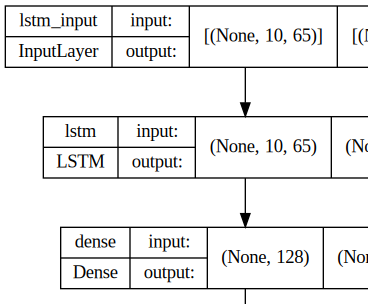

In [ ]:
model.summary()
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))

In [ ]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)
  

In [ ]:
# train the model, output generated text after each iteration
for iteration in range(1, 6):
    print()
    print('-' * 50)
    print('Iteration', iteration)
    model.fit(X, y,
              batch_size=128,
              epochs=4)


--------------------------------------------------
Iteration 1
Epoch 1/4
8/8 [==============================] - 0s 31ms/step - loss: 0.1102
Epoch 2/4
8/8 [==============================] - 0s 33ms/step - loss: 0.0769
Epoch 3/4
8/8 [==============================] - 0s 31ms/step - loss: 0.0580
Epoch 4/4
8/8 [==============================] - 0s 34ms/step - loss: 0.0489

--------------------------------------------------
Iteration 2
Epoch 1/4
8/8 [==============================] - 0s 32ms/step - loss: 0.0451
Epoch 2/4
8/8 [==============================] - 0s 31ms/step - loss: 0.0446
Epoch 3/4
8/8 [==============================] - 0s 33ms/step - loss: 0.1306
Epoch 4/4
8/8 [==============================] - 0s 33ms/step - loss: 0.0488

--------------------------------------------------
Iteration 3
Epoch 1/4
8/8 [==============================] - 0s 32ms/step - loss: 0.0397
Epoch 2/4
8/8 [==============================] - 0s 31ms/step - loss: 0.0417
Epoch 3/4
8/8 [=======================

In [ ]:
model.save('shakespeare_modelo.h5')

In [ ]:
print(sentence)
print(generated)

tter, shak


NameError: ignored

In [ ]:
start_index = random.randint(0, len(text) - maxlen - 1)
seed = text[start_index: start_index + maxlen]

seed = maxlen*" "

for diversity in [0.2, 0.5, 1.0, 1.2]:
    print()
    print('----- diversity:', diversity)

    generated = ''
    sentence = seed
    generated += sentence
    print('----- Generating with seed: "' + sentence + '"')
    sys.stdout.write(generated)

    for i in range(400):
        x = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(sentence):
            x[0, t, char2index[char]] = 1.

        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, diversity)
        next_char = index2char[next_index]

        generated += next_char
        sentence = sentence[1:] + next_char

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()


----- diversity: 0.2
----- Generating with seed: "          "
          furles domars aydon compreses, tin e branges ay bras corr on or oilliam
shakespeare

** texts rea as ancourary

f thes rllliar
shakespeare

**  ores rlewico inncardused bur ioncois corg inctrdunees iblary
shakespeare

** wollinedin comparston ondetarg inc., ard iof riblis dof ase nearin compeestedwof ionlliam
shakespeare

** wollinedin comparses, thy for your raas sour iol corguted et arg presente

----- diversity: 0.5
----- Generating with seed: "          "
          frrlewndory**

**
thets world library*in libers of ome futs sharewnale ay braa s. araanes. .

thes follis cor mof william shakespeare

** texts rea as coplion of arelate unelicerginncoprarg soma tedis ayeberlatext inec.t, bete iof ionliondoncorgetiow villis inllibras corkes akese cer anccoudarg

in erlinedibl complited of tom lllarais coprary and by ary arlis aresentarion.eo 
rewovg oue eses of vu

----- diversity: 1.0
----- Generating with seed: " 